In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
## Splitting Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns='target')
y = df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, stratify = y,random_state = 3) 
#stratify diperlukan karna kita bukan data continous

In [8]:
### Machine Learning Modelling

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
#Log Base 
modelLog = LogisticRegression()

In [11]:
modelLog.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_Log = modelLog.predict(X_test)

In [14]:
from sklearn.metrics import classification_report , confusion_matrix , roc_auc_score, recall_score , precision_score, accuracy_score

In [16]:
acc_Log = accuracy_score(y_test,y_Log)
acc_Log

0.8032786885245902

In [17]:
y_Log_train = modelLog.predict(X_train)

In [19]:
acc_Log_base = accuracy_score(y_train,y_Log_train)
acc_Log_base

0.8636363636363636

bisa dibilang perbandingan training data dan testing data lumayan bagus karna dia mendapat 86 di training dan testing mendapat 80

In [23]:
print(classification_report(y_test,y_Log)) 

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [35]:
cm = confusion_matrix(y_test, y_Log, labels=[1, 0])

In [25]:
df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

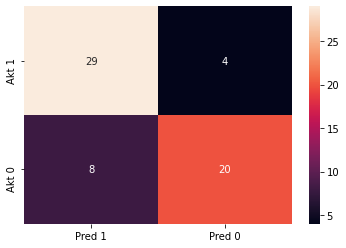

In [26]:
sns.heatmap(df_cm, annot=True)
plt.show() 

Dikarenakan kita melihat data yang balanced, kita bisa melihat / fokus kepada accuracy saja. dan jika kita lihat dari grafik di atas, model bisa memprediksi krg lebih sekitar 78% prediksi terkena penyakit jantung dan ternyata benar aktualnya terkena penyakit jantung (precission). kita akan fokuskan ke aktual nya yg terkena penyakit jantung, tetapi tidak diprediksi terkena penyakit jantung. karena bisa dikatakan itu lebih fatal daripada kita mendeteksi dia kena penyakit, padahal sebenarnya tidak. jadi kita akan berfokus kepada yg angka 4

In [27]:
from sklearn.neighbors import KNeighborsClassifier

### Model KNN Base

In [28]:
modelKNN = KNeighborsClassifier()

In [29]:
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_KNN = modelKNN.predict(X_test)

In [31]:
y_KNN_train = modelKNN.predict(X_train)

In [32]:
acc_KNN = accuracy_score(y_test,y_KNN)
acc_KNN

0.6557377049180327

In [33]:
acc_KNN_train = accuracy_score(y_train,y_KNN_train)
acc_KNN_train

0.7603305785123967

#### Berdasarkan model KNN Base bisa dikatakan bahwa data ini merupakan overfitting karena accuracynya pada saat train mendapat angka 76 dan testing di 65 , perbedaannya cukup jauh sekitar 11% dan jika dibandingkan dengan Logistic Regression base, masih jauh lebih bagus Logistic Regression.

In [36]:
cm_KNN = confusion_matrix(y_test, y_KNN, labels=[1, 0])

In [37]:
df_KNN = pd.DataFrame(data=cm_KNN, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

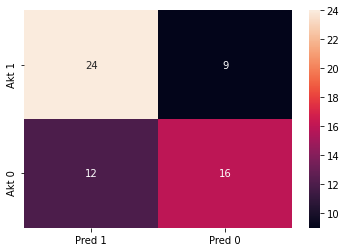

In [38]:
sns.heatmap(df_KNN, annot=True)
plt.show() 

#### Dari sini, bisa dilihat bahwa lebih banyak orang yang tidak terdeteksi terkena penyakit jantung padahal sebenarnya mereka mengidap penyakit jantung. maka model ini bisa dibilang tidak lebih baik daripada model yang sebelumnya. 

In [77]:
print(classification_report(y_test,y_KNN))

              precision    recall  f1-score   support

           0       0.64      0.57      0.60        28
           1       0.67      0.73      0.70        33

    accuracy                           0.66        61
   macro avg       0.65      0.65      0.65        61
weighted avg       0.65      0.66      0.65        61



### Model Random Forest Base

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model_RF = RandomForestClassifier()

In [68]:
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
y_RF = model_RF.predict(X_test)

In [70]:
y_RF_train = model_RF.predict(X_train)

In [71]:
acc_RF = accuracy_score(y_test,y_RF)
acc_RF

0.8032786885245902

In [72]:
acc_RF_train = accuracy_score(y_train,y_RF_train)
acc_RF_train

1.0

Dari sini bisa dilihat bahwa model sama dengan logistic regression karna di test data mendapatkan angka 80. Tetapi di train mendapat 1. yang bisa juga dikatakan menghafal(bukan memprediksi). 
Model Random Forest memang biasanya mendapat angka yg overfit karna memang ciri khas nya yg selalu overfit 

src : https://en.wikipedia.org/wiki/Random_forest

In [73]:
cm_RF = confusion_matrix(y_test, y_RF, labels=[1, 0])

In [74]:
df_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

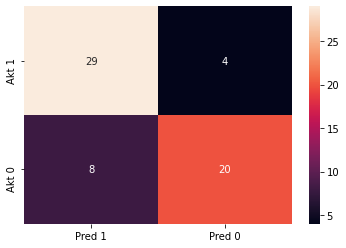

In [75]:
sns.heatmap(df_RF, annot=True)
plt.show() 

Dari sini data bisa dibilang sama dengan logistic Regression dimana data aktual yg terkena penyakit tapi diprediksi tidak, adalah 4 orang.

In [76]:
print(classification_report(y_test,y_RF)) 

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [79]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Hyper Parameter Tuning

### Hyper Parameter Logistic Regression

In [86]:
from sklearn.model_selection import GridSearchCV

In [88]:
model_Log_Tuned = LogisticRegression()

In [89]:
parameter_log = {
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'class_weight' : ['balanced'],
            'max_iter' : [100,200]
}

In [91]:
log_tuned = GridSearchCV(estimator=model_Log_Tuned, param_grid=parameter_log, cv = 10, n_jobs=-1, verbose=1)

In [92]:
log_tuned.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   11.2s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'None'],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=1)

In [93]:
log_tuned.best_estimator_ #dari sini bisa dilihat bahwa class weight yg balanced dan max iter 200 adalah yg terbaik

LogisticRegression(class_weight='balanced', max_iter=200)

In [94]:
log_tuned.best_score_ 

0.8388333333333332

In [95]:
Tuned_Log_Test=log_tuned.predict(X_test)

In [96]:
Tuned_Log_Train = log_tuned.predict(X_train)

In [97]:
Acc_Tuned_Log_Test = accuracy_score(y_test,Tuned_Log_Test)

In [98]:
Acc_Tuned_Log_Train = accuracy_score(y_train,Tuned_Log_Train)

In [99]:
print('Accuracy Score Tuning Log Reg Test :',Acc_Tuned_Log_Test)
print('Accuracy Score Tuning Log Reg Train :', Acc_Tuned_Log_Train)

Accuracy Score Tuning Log Reg Test : 0.8032786885245902
Accuracy Score Tuning Log Reg Train : 0.8553719008264463


Ternyata tidak berbeda jauh dg hasil yg tidak di tuning. yg berbeda di tuning adalah data train naik sekitar 2%

### Hyper Parameter KNN

In [120]:
KNN_Tuning = KNeighborsClassifier()

In [121]:
knn_param = {
    'n_neighbors':[5,3,9,11,15,27,19],
    'weights':['uniform','distance'],
    'leaf_size':[30,50,70],
    'metric_params':[None,dict],
    
}

In [122]:
KNN_Tuned = GridSearchCV(estimator=KNN_Tuning, param_grid=knn_param, cv = 10, n_jobs=-1, verbose=1)

In [123]:
KNN_Tuned.fit(X_train,y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:    2.0s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [30, 50, 70],
                         'metric_params': [None, <class 'dict'>],
                         'n_neighbors': [5, 3, 9, 11, 15, 27, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [124]:
KNN_Tuned_Test = KNN_Tuned.predict(X_test)

In [125]:
KNN_Tuned_Train = KNN_Tuned.predict(X_train)

In [126]:
Acc_Tuned_KNN_Test = accuracy_score(y_test,KNN_Tuned_Test)
Acc_Tuned_KNN_Test

0.6557377049180327

In [128]:
Acc_Tuned_KNN_Train = accuracy_score(y_train,KNN_Tuned_Train)
Acc_Tuned_KNN_Train

0.7603305785123967

### Hyper Parameter Random Forest

In [188]:
from sklearn.model_selection import RandomizedSearchCV

In [176]:
RF_Tuning = RandomForestClassifier()

In [243]:
param_RF ={"max_depth" : [None,5],
          "min_samples_split" : [ 9, 15],
          "min_samples_leaf" : [ 2, 5],
          "max_features" : [None, .8],
           "n_estimators": [100,200,400]
          }

In [244]:
RF_Tuned = GridSearchCV(estimator=RF_Tuning, param_grid=param_RF, cv = 10, n_jobs=-1, verbose=1)

In [245]:
RF_Tuned.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  2.9min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5], 'max_features': [None, 0.8],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [9, 15],
                         'n_estimators': [100, 200, 400]},
             verbose=1)

In [246]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [247]:
RF_Tuned_Test = RF_Tuned.predict(X_test)

In [248]:
RF_Tuned_Train = RF_Tuned.predict(X_train)

In [249]:
Acc_Tuned_RF_Test = accuracy_score(y_test,RF_Tuned_Test)
Acc_Tuned_RF_Test

0.8032786885245902

In [250]:
Acc_Tuned_RF_Train = accuracy_score(y_train,RF_Tuned_Train)
Acc_Tuned_RF_Train

0.9256198347107438

In [251]:
print(classification_report(y_test,Tuned_Log_Test))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [252]:
print(classification_report(y_test,KNN_Tuned_Test))

              precision    recall  f1-score   support

           0       0.64      0.57      0.60        28
           1       0.67      0.73      0.70        33

    accuracy                           0.66        61
   macro avg       0.65      0.65      0.65        61
weighted avg       0.65      0.66      0.65        61



In [253]:
print(classification_report(y_test,RF_Tuned_Test))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



Dari klasifikasi diatas, bisa dilihat kita akan menggunakan perbandingan hasil Logistic Regression dengan Random Forest karna akurasi sama2 80%

In [254]:
cm_RF_Tuned = confusion_matrix(y_test, RF_Tuned_Test, labels=[1, 0])
df_RF_Tuned = pd.DataFrame(data=cm_RF_Tuned, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

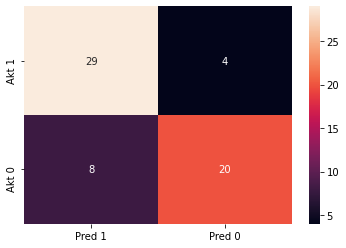

In [255]:
sns.heatmap(df_RF_Tuned, annot=True)
plt.show() 

In [256]:
cm_LogT = confusion_matrix(y_test, Tuned_Log_Test, labels=[1, 0])
df_Log_Tuned = pd.DataFrame(data=cm_LogT, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

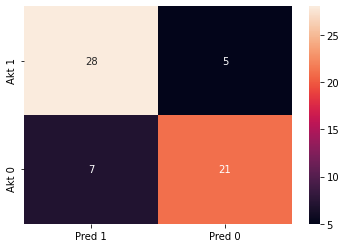

In [257]:
sns.heatmap(df_Log_Tuned, annot=True)
plt.show() 

Dari Confusion Metrics diatas, bisa dilihat karna kita fokus terhadap pendeteksi penyakit jantung, maka kita fokus terhadap aktual 1 prediksi 0 (dimana dia harusnya dideteksi mengidap penyakit jantung, tetapi Machine Learning mendeteksi tidak mengidap penyakit jantung). saya fokus disini karna lebih berakibat fatal. (harus segera dilakukan pertolongan jika sebenarnya mengidap penyakit jantung). 

#### Dari sini bisa dilihat bahwa menggunakan hyper parameter tuning di Random Forest lebih baik daripada Hyper Logistic Regression karna yang kita fokuskan adalah mengecilkan aktual 1 prediksi 0 (dimana dia harusnya dideteksi mengidap penyakit jantung, tetapi tidak terdeteksi). tingkat Recall 1 nya yaitu 88%

## Export Model

In [242]:
import joblib

In [259]:
joblib.dump(RandomForestClassifier, 'ModelHeartDisease')

['ModelHeartDisease']

# Kesimpulan dan Saran :

Dari data diatas, bisa dikatakan bahwa machine learning tidak akan memprediksi 100% benar, maka yg sebaiknya dilakukan adalah kita mengecek terlebih dahulu dari data-data yang ada, apakah kira2 dia cenderung masuk ke yes atau tidak (yes = punya heart disease). Dari data tersebut kita bisa membantu masyarakat supaya lebih aware terhadap tubuh mereka, dan tidak menyepelekan gejala kemudian akhirnya terlambat. 

- Dari EDA bisa dilihat bahwa tidak semua orang yg berumur 60 tahun keatas pasti mempunyai masalah jantung
- Untuk Max Heart Rate dibawah 110 mempunyai tingkat kemungkinan tinggi bahwa pasien tidak mempunyai masalah jantung
- Perempuan lebih riskan terkena penyakit jantung
- memiliki CA (Number of Major Vessel coloured by flourosopy) di angka 2 maupun 3 mempunyai chance lumayan tinggi untuk tidak mendapatkan penyakit jantung